<a href="https://colab.research.google.com/github/YenLinWu/Trend_Detection/blob/main/Dynamic_Time_Warping/Studying_Note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Similarity Matching 

Similarity matching attempts to identify similar individuals based on data known about them. 


- Given a time series $Q$ in time series database (TSDB), and a <font color="#00dd00">**similarity/dissimilarity measure** $d(T,S)$</font> defined for each pair $T$, $S$ in TSDB, the former query deals with the search of the set of first $k$ time series in TSDB more similar to $Q$. The latter query finds the set $R$ of time series that are within distance $r$ from $Q$. 

- There are two ways to post a similarity query in time series databases:  
  - <font color="#00dd00">whole matching</font> : given a TSDB of time series, each of length n, whole matching relates to computation of similarity matching among time series along their whole length.  
  - <font color="#00dd00">subsequence matching</font> : given a TSDB of $m$ time series $S_1$, $S_2$, ..., $S_m$, each of length $n_i$, and a short query time series $Q$ of length $n_q < n_i$, with $0 < i < m$, subsequence matching relates to finding matches of $Q$ into subsequences of every $S_i$, starting at every position.  

- Distance measures play an important role for similarity problem, in data mining tasks. Concerning a distance measure, it is important to understand if it can be considered metric.  

- A <font color="#00dd00">**metric function**</font> on a TSDB is a function $f$ : TSDB $\times$ TSDB → $\mathbb{R}$. A metric function obeys to four fundamental properties:    
  For all $X$, $Y$, $Z$ in TSDB,
  - **non-negativity** : $f(X,Y)\geq 0$     
  - **identity** : $f(X,Y)=0$ if and only if $X=Y$   
  - **symmetry** : $f(X,Y) = f(Y,X)$    
  - **triangle inequality** : $f(X,Z) \leq f(X,Y) + f(Y,Z)$

## <font color="#00dd00">**Euclidean Distance**</font>   

**Euclidean Distance** is the most used distance function in many   applications. It is defined as
$$\text{dist}(X,Y) = ||X-Y|| = \sqrt{\sum_{i=1}^{n} (x_i-y_i)^2} \text{ , }$$  
where $X=[x_1, x_2, \dots, x_n ]$ and $Y=[y_1, y_2, \dots, y_n]$ in a $n$-dimensional space.



- <font color="#00dd00">Euclidean Distance</font> obeys to the metric properties on TSDB: non-negativity, identity, symmetry and triangle inequality.  

- In every way, Euclidean distance makes inappropriate their use in certain applications:   
    - It compares only time series of the same length.  
    - It doesn’t handle outliers or noise.  
    - It is very sensitive(敏感的) respect to six signal transformations: shifting, uniform amplitude scaling, uniform time scaling, uniform bi-scaling, time warping and non-uniform amplitude scaling.

## <font color="#00dd00">**Dynamic Time Warping**</font>  

**Dynamic Time Warping (DTW)** is an algorithm for measuring similarity between two time series which may vary (i.e. warp) in timing. DTW gives more robustness to the similarity computation, because it replaces the one-to-one point comparison with a many-to-one (and viceversa) comparison. <font color="#dddd00">The main feature of this distance measure is that it allows to recognize similar shapes, even if they present signal transformations</font>, such as shifting and/or scaling.  

<p align="center">
<img width="500" src="https://raw.githubusercontent.com/YenLinWu/Trend_Detection/main/Dynamic_Time_Warping/imgs/Difference_between_DTW_Distance_and_Euclidean_Distance.png">
</p>

- Given two time series $T=\{t_1,t_2,\cdots,t_n\}$ and $S=\{s_1,s_2,\cdots,s_m\}$ of length $n$ and $m$, respectively. <font color="#dddd00">The goal of DTW is to find a <font color="#00dd00">warping path</font> $\{(p_1,q_1),(p_2,q_2),\cdots,(p_k,q_k)\}$, where $\max(n,m)<k<m+n-1$, such that the distance on this warping path 
$$\sum_{i=1}^{k} |t_{p_i}−s_{q_i}|$$ is minimized with $(p_1,q_1)=(1,1)$ and $(p_k,q_k)=(n,m)$.</font> This is a typical example of "anchored beginning" and "anchored end".

- The warping path is subject to several constraints : 
  - **Boundary Conditions** : $(p_1,q_1)=(1,1)$ and $(p_k,q_k)=(n,m)$；  
  - **Continuity** and **Monotonically non-Decreasing** : for any given node $(i,j)$ in the warping path, the possible fan-in nodes are restricted to $(i−1,j)$, $(i,j−1)$, $(i−1,j−1)$.  
  Moreover, for any given element in $T$, we should be able to find at least one corresponding element in $S$, and vice versa.
  



### **Optimum Warping Path**  

The optimum warping path can be efficiently computed using <font color="#00dd00">Dynamic Programming (DP, 動態規劃)</font>. 

<p align="center">
<img width="500" src="https://raw.githubusercontent.com/YenLinWu/Trend_Detection/main/Dynamic_Time_Warping/imgs/Warping_Path_Computation_Using_Dynamic_Programming.png">
</p>




- Given two time series $T=\{t_1,t_2,\cdots,t_n\}$ and $S=\{s_1,s_2,\cdots,s_m\}$ of length $n$ and $m$, respectively, a $n \times m$ <font color="#00dd00">distance matrix</font> is given by    
</br>  
\begin{equation*}
\text{distMatrix} = 
\begin{pmatrix}
d(t_1,s_1) & d(t_1,s_2)  & \cdots & d(t_1,s_m)  \\
d(t_2,s_1)  & d(t_2,s_2)  & \cdots & d(t_2,s_m)  \\
\vdots  & \vdots  & \ddots & \vdots  \\
d(t_n,s_1)  & d(t_n,s_2)  & \cdots & d(t_n,s_m)  
\end{pmatrix} \\
\end{equation*} 
</br>
where $d(t_i, s_j)$, with $1\leq i\leq n$ and $1\leq j\leq m$, is the distance of $i$th point of $T$ and $j$th point of $S$. 
  
- A **cumulative distance matrix $\gamma$** of the same dimension as the distMatrix, is created to store in the cell $(i, j)$ the following value
</br>
$$\gamma(i,j)=d(t_i,s_j)+min{\big\{\gamma(i−1,j−1), \gamma(i−1,j), \gamma(i,j−1)\big\}} \text{.}$$  
</br>

- In many cases, this method can bring to undesired effects. <font color="#dd0000">The most criticized disadvantage of DTW is the complexity of space and time, which are both $O(nm)$.</font> <font color="#dddd00">A common way to overcome this problem is to  **restrict the warping path in such a way it has to follow a direction along the diagonal**.</font> To do this, we can restrict the path enforcing the recursion to stop at a certain depth, represented by a threshold $\delta$. Then, the cumulative distance matrix $\gamma$ will be calculated as follows:   
</br>
\begin{equation}
    \gamma(i, j) = 
    \begin{cases}
      d(t_i,s_j)+min{\big\{\gamma(i−1,j−1), \gamma(i−1,j), \gamma(i,j−1)\big\}}, \quad |i-j|<\delta \text{,}\\
      \infty, \quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad\quad otherwise.
    \end{cases}\
\end{equation}   
</br>
This constraint, besides limiting extreme or degenerate mappings, allows to speed-up DTW distance calculation, because we need to store only distances which are at most $\delta$ positions away (in horizontal and vertical direction) from the distMatrix diagonal. This reduces the computational complexity to $O((n+m)\delta)$. The above proposed constraint is known also as <font color="#00dd00">Sakoe-Chiba Band</font>, and it <font color="#dddd00">is classified as global constraint</font>.      
</br>
<p align="center">
<img width="500" src="https://raw.githubusercontent.com/YenLinWu/Trend_Detection/main/Dynamic_Time_Warping/imgs/Sakoe_Chiba_Band.png">
</p>
</br>
Another most common global constraint is the <font color="#00dd00">Itakura parallelogram</font>. 

# Demo Example Using <font color="#00dd00">**dtw**</font> Package  

References      
  [1] [dtw-python: Dynamic Time Warping in Python](https://dynamictimewarping.github.io/python/)  
  [2] [Source code](https://github.com/DynamicTimeWarping/dtw-python) of dtw-python

## Import Libaries

In [ ]:
!pip install dtw-python

In [ ]:
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('default')
from dtw import *

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



## Create Two Time Sequences

In [ ]:
# Two time series data
x1 = np.arange(0, 20, .5)
x2 = np.arange(0, 20, .4)
s1 = np.sin(x1)
s2 = np.cos(x2)

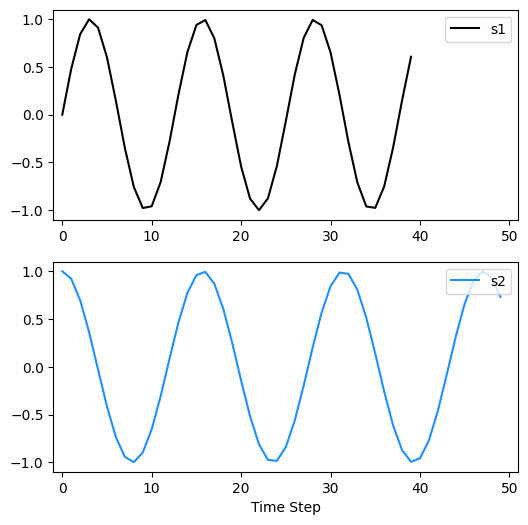

In [ ]:
plt.subplots( figsize=(6,6) )

plt.subplot(211)
plt.plot(s1, color='black', label='s1')
plt.legend( loc=1 )
plt.xlim( [-1,51] )

plt.subplot(212)
plt.plot(s2, color='dodgerblue', label='s2')
plt.legend( loc=1 )
plt.xlim( [-1,51] )
plt.xlabel( 'Time Step' )

plt.show()

## Sakoe-Chiba Band

In [ ]:
alignment = dtw( s1, s2, keep_internals=True, 
                 window_type='sakoechiba', window_args={'window_size':10}  )

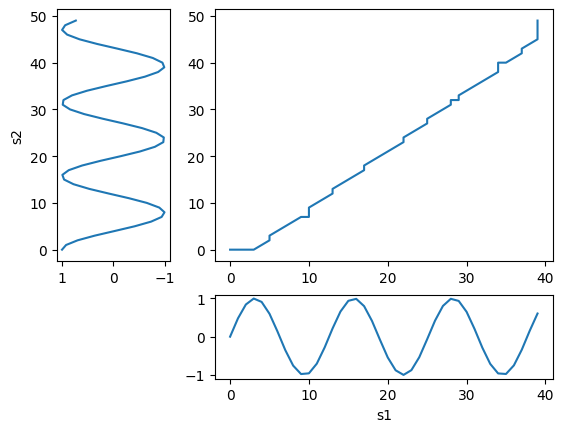

In [ ]:
alignment.plot( type='threeway', xlab='s1', ylab='s2' )
plt.show()

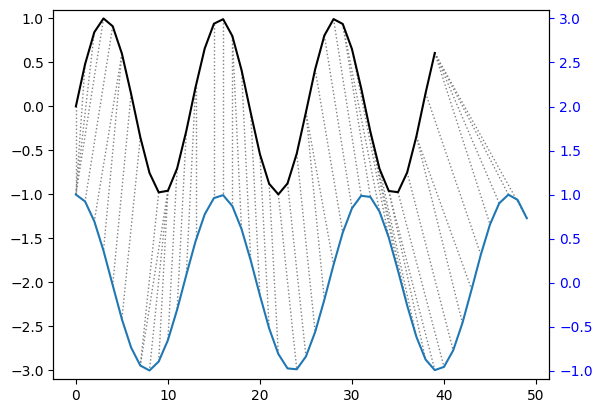

In [ ]:
alignment.plot( type='twoway', offset=-2 )
plt.show()

# Demo Example Using <font color="#00dd00">**dtaidistance**</font> Package  

References      
  [1] [DTAIDistance’s documentation](https://dtaidistance.readthedocs.io/en/latest/index.html)  
  [2] [Source code](https://github.com/wannesm/dtaidistance)  of dtaidistance


## Import Libaries

In [ ]:
!pip install dtaidistance

In [ ]:
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('default')
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

## Create Two Time Sequences

In [ ]:
# Two time series data
x1 = np.arange(0, 20, .5)
x2 = np.arange(0, 20, .4)
s1 = np.sin(x1)
s2 = np.cos(x2)

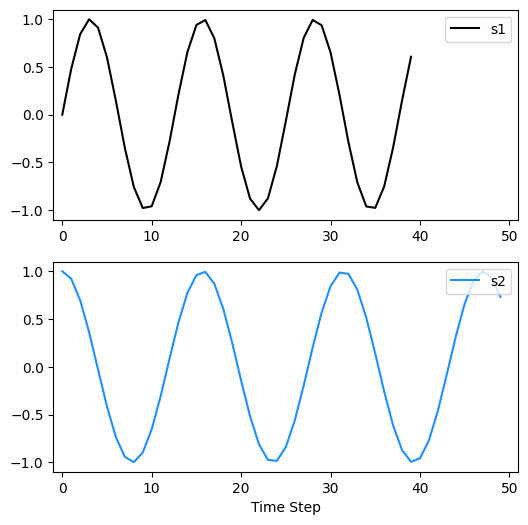

In [ ]:
plt.subplots( figsize=(6,6) )

plt.subplot(211)
plt.plot(s1, color='black', label='s1')
plt.legend( loc=1 )
plt.xlim( [-1,51] )

plt.subplot(212)
plt.plot(s2, color='dodgerblue', label='s2')
plt.legend( loc=1 )
plt.xlim( [-1,51] )
plt.xlabel( 'Time Step' )

plt.show()

## DTW Distance Measure

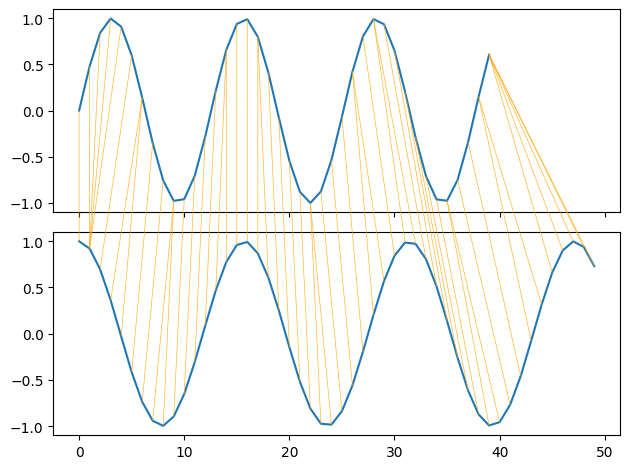

In [ ]:
path = dtw.warping_path( s1, s2 )

dtwvis.plot_warping( s1, s2, path )
plt.show()  

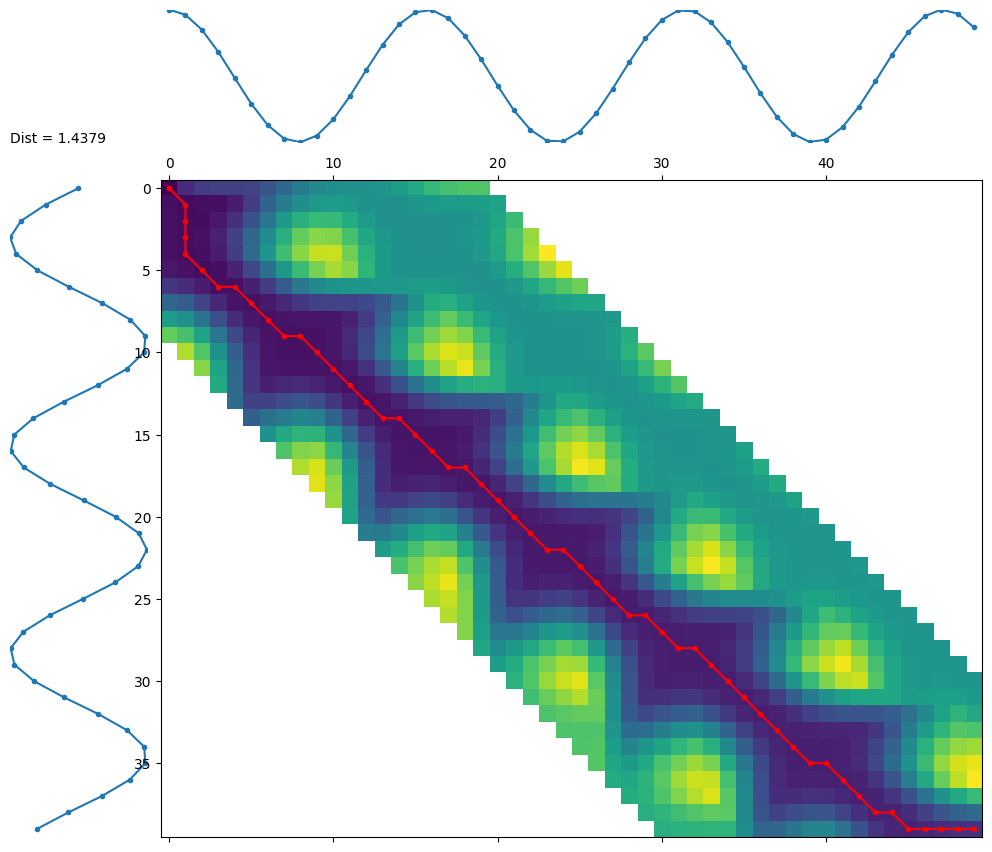

In [ ]:
d, paths = dtw.warping_paths( s1, s2, window=10 )
best_path = dtw.best_path( paths )
dtwvis.plot_warpingpaths( s1, s2, paths, best_path )
plt.show()

# References  

[1] [Similarity Measures and Dimensionality Reduction Techniques for Time Series Data Mining](https://www.intechopen.com/chapters/39030), Carmelo Cassisi, Placido Montalto, Marco Aliotta, Andrea Cannata and Alfredo Pulvirenti, September 2012.  
[2] [Time Series Similarity Using Dynamic Time Warping -Explained](https://medium.com/walmartglobaltech/time-series-similarity-using-dynamic-time-warping-explained-9d09119e48ec), Abhishek Mishra, December 2020.